<a href="https://colab.research.google.com/github/yoshioakio/UAS-Artificial_Intelegence-Muhamad_Fajri_Permana_Haryanto-20220801439/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tahap Analisis Awal Data dan Prapemrosesan Data**

🛠️ Pada tahap awal, diperlukan proses preprocessing data untuk memastikan bahwa data yang akan dianalisis akurat, sehingga dapat menghasilkan interpretasi yang baik dan informatif.

# **1. Perkenalan Dataset**

Dataset yang digunakan dalam analisis ini diambil dari Kaggle dengan judul dataset **Netflix Movies and TV Shows** (https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows/data), yang mencakup informasi terkait seputar platform media Netflix (media and video streaming platforms).

# **2. Import Library**

🗃️liblary pyhton yang digunakana untuk analisis data dan pembangunan model algoritma machine learning ini

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os


# **3. Data Wrangling**

## **Gathering Data**📑

In [ ]:
path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")

In [ ]:
file_path = os.path.join(path, 'netflix_titles.csv')
netflix_df = pd.read_csv(file_path)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Assesing Data**💯

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
print("Jumlah duplikasi data: ", netflix_df.duplicated().sum())

Jumlah duplikasi data:  0


In [ ]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## **Cleaning Data**

### 🔄️**Menangani Missing Value**

In [ ]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#### 1️⃣**Menangani Missing Value director**

In [ ]:
netflix_df[netflix_df['director'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


**Untuk mengatasi missing value pada kolom director, kita harus tinjau dulu perbandingan data yang hilangnnya**

In [ ]:
total_data_netflix = netflix_df.shape[0]
total_missing_director = netflix_df['director'].isna().sum()
persentase_missing_director = (total_missing_director / total_data_netflix) * 100
persentase_non_missing_director = 100 - persentase_missing_director

print(f"Total data Netflix: {total_data_netflix}")
print(f"Total missing value pada kolom 'director': {total_missing_director}")
print(f"Persentase missing value pada kolom 'director': {persentase_missing_director:.2f}%")
print(f"Persentase non-missing value pada kolom 'director': {persentase_non_missing_director:.2f}%")

Total data Netflix: 8807
Total missing value pada kolom 'director': 2634
Persentase missing value pada kolom 'director': 29.91%
Persentase non-missing value pada kolom 'director': 70.09%


**Berdasarkan analisis data, ditemukan bahwa kolom director memiliki sekitar 30% missing values. Menghapus baris dengan nilai kosong berisiko mengurangi jumlah data secara signifikan, sehingga dipilih pendekatan yang lebih sesuai. Dalam penanganan ini, nilai yang hilang akan diisi dengan "Unknown" untuk mempertahankan integritas data tanpa mengurangi jumlah observasi. Pendekatan ini memastikan bahwa analisis tetap dapat dilakukan tanpa kehilangan informasi dari variabel lain yang tersedia, begituhpun dengan penanganan yang lainnya**

In [ ]:
netflix_df.fillna({'director': 'notknown'}, inplace=True)

In [ ]:
netflix_df['director'].isnull().sum()

0

#### 2️⃣**Menangani Missing Value cast**

In [ ]:
netflix_df[netflix_df['cast'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
3,s4,TV Show,Jailbirds New Orleans,notknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",notknown,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,notknown,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
...,...,...,...,...,...,...,...,...,...,...,...,...
8746,s8747,Movie,Winnie,Pascale Lamche,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
8755,s8756,TV Show,Women Behind Bars,notknown,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
8756,s8757,Movie,Woodstock,Barak Goodman,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...


**Untuk mengatasi missing value pada kolom cast, kita harus tinjau dulu perbandingan data yang hilangnnya**

In [ ]:
total_data_netflix = netflix_df.shape[0]
total_missing_cast = netflix_df['cast'].isna().sum()
persentase_missing_cast = (total_missing_cast / total_data_netflix) * 100
persentase_non_missing_cast = 100 - persentase_missing_cast

print(f"Total data Netflix: {total_data_netflix}")
print(f"Total missing value pada kolom 'cast': {total_missing_cast}")
print(f"Persentase missing value pada kolom 'cast': {persentase_missing_cast:.2f}%")
print(f"Persentase non-missing value pada kolom 'cast': {persentase_non_missing_cast:.2f}%")

Total data Netflix: 8807
Total missing value pada kolom 'cast': 825
Persentase missing value pada kolom 'cast': 9.37%
Persentase non-missing value pada kolom 'cast': 90.63%


In [ ]:
netflix_df.fillna({'cast': 'notknown'}, inplace=True)

In [ ]:
netflix_df['cast'].isnull().sum()

0

#### 3️⃣**Menangani Missing Value country**

In [ ]:
netflix_df[netflix_df['country'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,notknown,notknown,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",notknown,notknown,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,notknown,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,notknown,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [ ]:
total_data_netflix = netflix_df.shape[0]
total_missing_country = netflix_df['country'].isna().sum()
persentase_missing_country = (total_missing_country / total_data_netflix) * 100
persentase_non_missing_country = 100 - persentase_missing_country

print(f"Total data Netflix: {total_data_netflix}")
print(f"Total missing value pada kolom 'country': {total_missing_country}")
print(f"Persentase missing value pada kolom 'country': {persentase_missing_country:.2f}%")
print(f"Persentase non-missing value pada kolom 'country': {persentase_non_missing_country:.2f}%")

Total data Netflix: 8807
Total missing value pada kolom 'country': 831
Persentase missing value pada kolom 'country': 9.44%
Persentase non-missing value pada kolom 'country': 90.56%


In [ ]:
netflix_df.fillna({'country': 'notknown'}, inplace=True)

In [ ]:
netflix_df['country'].isnull().sum()

0

#### 4️⃣**Menangani Missing Value date_added**

In [ ]:
netflix_df[netflix_df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,notknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,notknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,notknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,notknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,notknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,notknown,Igor Dmitriev,notknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,notknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,notknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,notknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,notknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
total_data_netflix = netflix_df.shape[0]
total_missing_date_added = netflix_df['date_added'].isna().sum()
persentase_missing_date_added = (total_missing_date_added / total_data_netflix) * 100
persentase_non_missing_date_added = 100 - persentase_missing_date_added

print(f"Total data Netflix: {total_data_netflix}")
print(f"Total missing value pada kolom 'date_added': {total_missing_date_added}")
print(f"Persentase missing value pada kolom 'date_added': {persentase_missing_date_added:.2f}%")
print(f"Persentase non-missing value pada kolom 'date_added': {persentase_non_missing_date_added:.2f}%")

Total data Netflix: 8807
Total missing value pada kolom 'date_added': 10
Persentase missing value pada kolom 'date_added': 0.11%
Persentase non-missing value pada kolom 'date_added': 99.89%


In [ ]:
netflix_df['date_added'].mode()

,date_added
0,"January 1, 2020"


In [ ]:
a = 'January 1, 2020'

In [ ]:
netflix_df.fillna({'date_added': a}, inplace=True)

In [ ]:
netflix_df['date_added'].isnull().sum()

0

#### 5️⃣**Menangani Missing Value rating**

In [ ]:
netflix_df[netflix_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,notknown,"Oprah Winfrey, Ava DuVernay",notknown,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,notknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,notknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
total_data_netflix = netflix_df.shape[0]
total_missing_rating = netflix_df['rating'].isna().sum()
persentase_missing_rating = (total_missing_rating / total_data_netflix) * 100
persentase_non_missing_rating = 100 - persentase_missing_rating

print(f"Total data Netflix: {total_data_netflix}")
print(f"Total missing value pada kolom 'rating': {total_missing_rating}")
print(f"Persentase missing value pada kolom 'rating': {persentase_missing_rating:.2f}%")
print(f"Persentase non-missing value pada kolom 'rating': {persentase_non_missing_rating:.2f}%")

Total data Netflix: 8807
Total missing value pada kolom 'rating': 4
Persentase missing value pada kolom 'rating': 0.05%
Persentase non-missing value pada kolom 'rating': 99.95%


In [ ]:
netflix_df.fillna({'rating': 'notknown'}, inplace=True)

In [ ]:
netflix_df['rating'].isnull().sum()

0

#### 6️⃣**Menangani Missing Value duration**

In [ ]:
netflix_df[netflix_df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
total_data_netflix = netflix_df.shape[0]
total_missing_duration = netflix_df['duration'].isna().sum()
persentase_missing_duration = (total_missing_duration / total_data_netflix) * 100
persentase_non_missing_duration = 100 - persentase_missing_duration

print(f"Total data Netflix: {total_data_netflix}")
print(f"Total missing value pada kolom 'duration': {total_missing_duration}")
print(f"Persentase missing value pada kolom 'duration': {persentase_missing_duration:.2f}%")
print(f"Persentase non-missing value pada kolom 'duration': {persentase_non_missing_duration:.2f}%")

Total data Netflix: 8807
Total missing value pada kolom 'duration': 3
Persentase missing value pada kolom 'duration': 0.03%
Persentase non-missing value pada kolom 'duration': 99.97%


In [ ]:
netflix_df['duration'].mode()

,duration
0,1 Season


In [ ]:
b = '1 Season'

In [ ]:
netflix_df.fillna({'duration': b}, inplace=True)

In [ ]:
netflix_df['duration'].isnull().sum()

0

#### 🆗**Mengecek Apakah Masih Ada Missing Value**

In [ ]:
netflix_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# **4. Exploratory Data Analysis (EDA)**

### 💫**Melihat Jumlah Distribusi Riris Pertahun**

In [ ]:
netflix_df['release_year'].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1925,1
1961,1


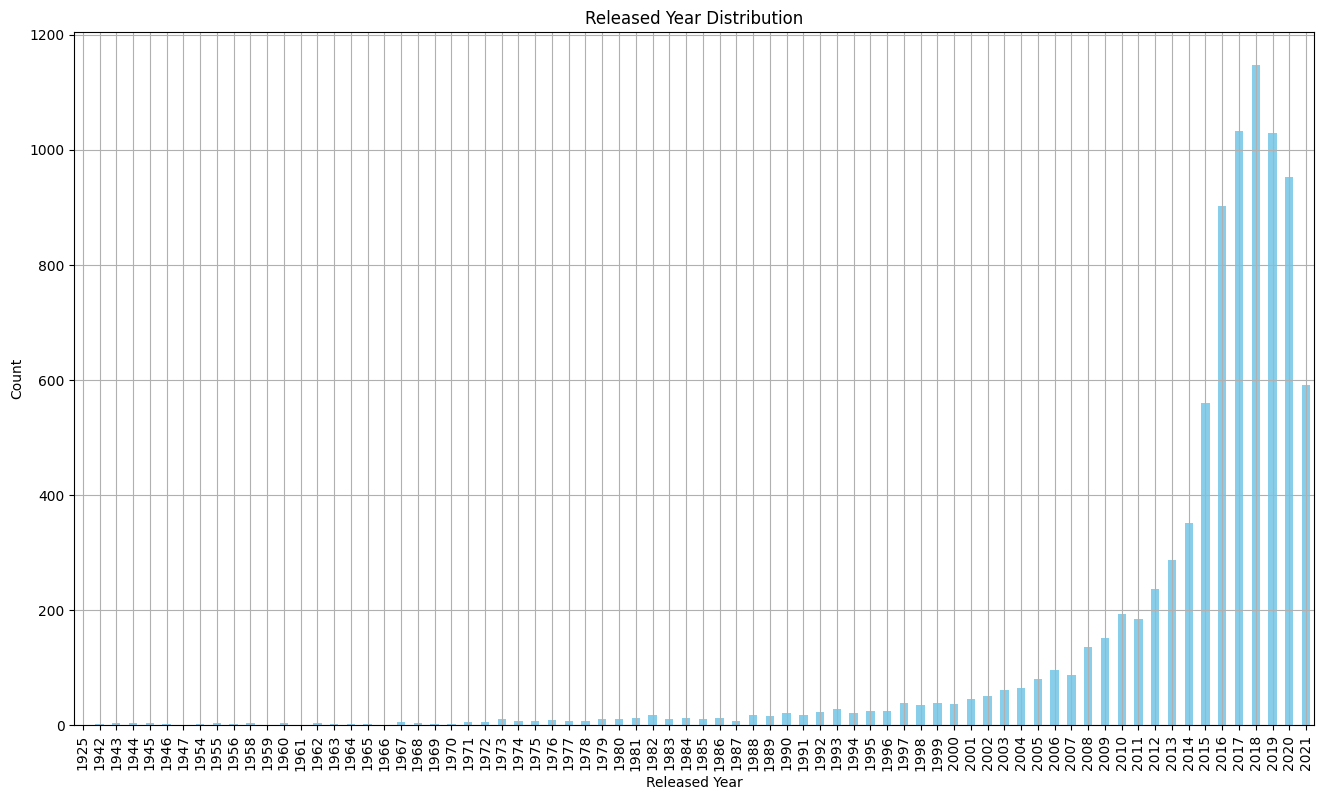

In [ ]:
plt.figure(figsize = (16,9))
netflix_df['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue');
plt.title("Released Year Distribution");
plt.xlabel("Released Year");
plt.ylabel("Count");
plt.grid()

### 📹**Melihat Jumlah Distribusi Pertype**

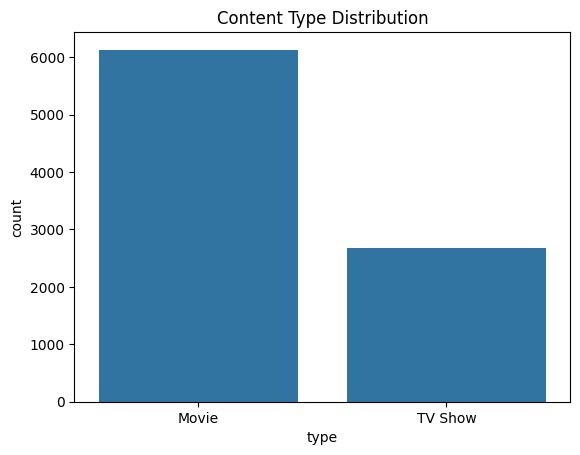

In [ ]:
sns.countplot(data=netflix_df, x='type')
plt.title('Content Type Distribution')
plt.show()

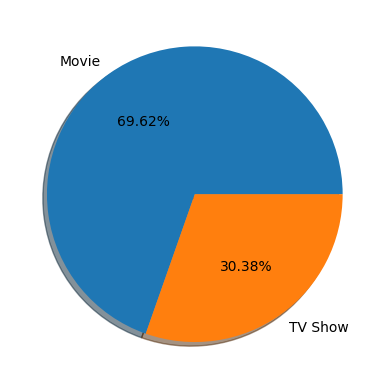

In [ ]:
plt.pie(netflix_df['type'].value_counts() , labels = netflix_df['type'].value_counts().index,
       autopct = '%.2f%%', startangle = 0, shadow = True);

### 🏷️**Melihat Distribusi Rating Pertype**

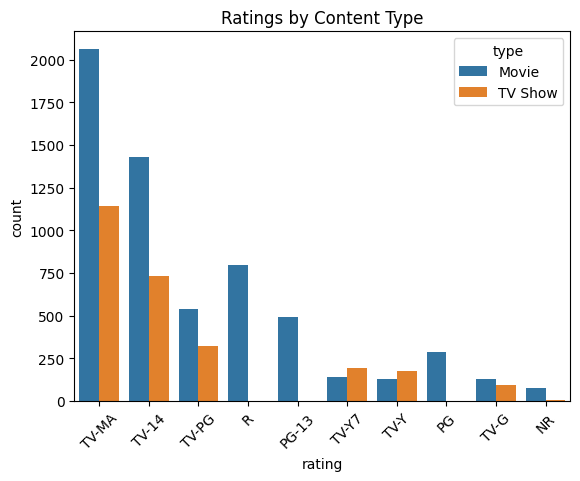

In [ ]:
sns.countplot(data=netflix_df, x='rating', hue='type', order=netflix_df['rating'].value_counts().index[:10])
plt.title('Ratings by Content Type')
plt.xticks(rotation=45)
plt.show()

### 🧑‍💼**Melihat Jumlah Distribusi Director**

distribusi pada kolom director teratas

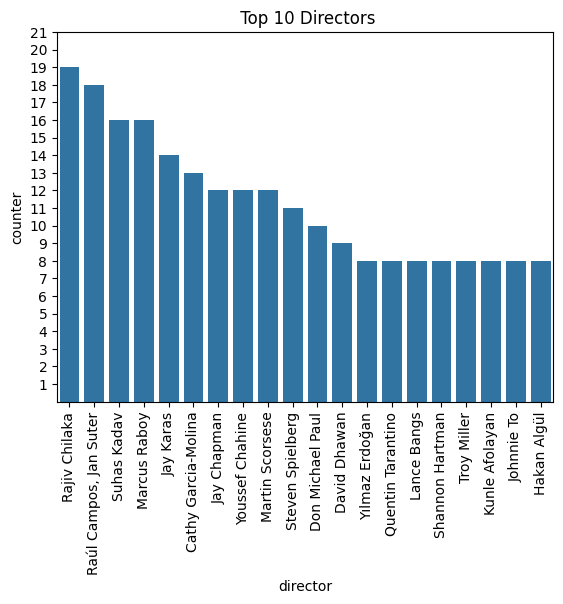

In [ ]:
sns.barplot(x=netflix_df['director'].value_counts()[1:21].index,y=netflix_df['director'].value_counts()[1:21].values)
plt.xticks(rotation=90)
plt.title(' Top 10 Directors')
plt.yticks(np.arange(1,22))
plt.ylabel('counter')
plt.show()

distribusi pada kolom director terbawah

In [ ]:
netflix_df['director'].value_counts().tail(10)

,count
director,
Azazel Jacobs,1
Jung Ji-woo,1
Matt D'Avella,1
Parthiban,1
Scott McAboy,1
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1
Will Eisenberg,1


### 🎬**Melihat Jumlah Distribusi Pergenre film**

In [ ]:
netflix_df['listed_in'].value_counts().head(10)

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


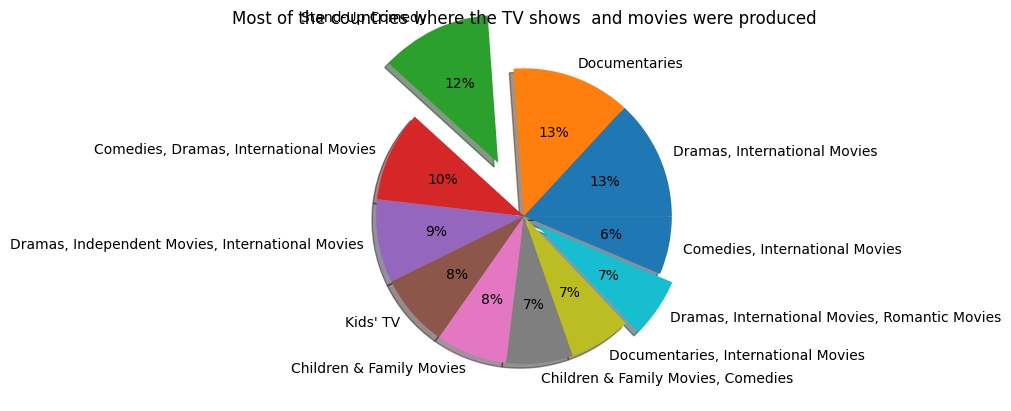

In [ ]:
plt.pie(netflix_df['listed_in'].value_counts()[0:11].values,labels=netflix_df['listed_in'].value_counts()[0:11].index,explode=[0,0,0.4,0,0,0,0,0,0,0.1,0],autopct="%0.0f%%",shadow=True)
plt.title('Most of the countries where the TV shows  and movies were produced')
plt.show()

### 🌏**Melihat Jumlah Distribusi Pernegara**

distribusi pernegara teratas

In [ ]:
netflix_df['country'].value_counts().head(12)

,count
country,
United States,2818
India,972
notknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


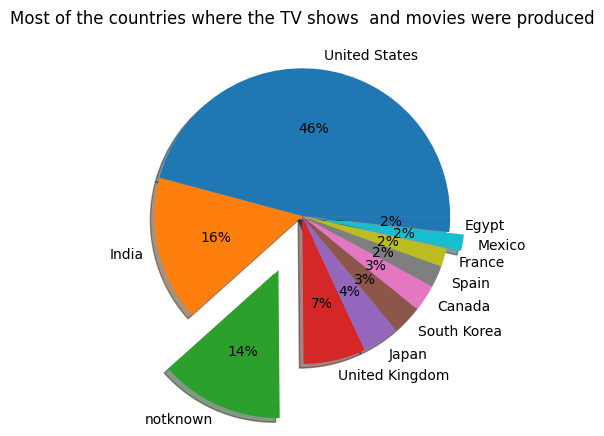

In [ ]:
plt.pie(netflix_df['country'].value_counts()[0:11].values,labels=netflix_df['country'].value_counts()[0:11].index,explode=[0,0,0.4,0,0,0,0,0,0,0.1,0],autopct="%0.0f%%",shadow=True)
plt.title('Most of the countries where the TV shows  and movies were produced')
plt.show()

### ♾️**Melihat Jumlah Nilai Unik Tiap Kolom**

In [ ]:
print(netflix_df['rating'].nunique())
print(netflix_df['country'].nunique())
print(netflix_df['listed_in'].nunique())
print(netflix_df['release_year'].nunique())

18
749
514
74


# **5. Data Preprocessing**

## **1️⃣ Binning Data**

📌 Kenapa perlu dilakukan binning?
* Karena jumlah nilai unik tiap kolom banyak jadi perlu dilakukan binning/pengelompokkan (Mengurangi jumlah kategori yang terlalu banyak).
* Binning ini membantu menjaga kualitas data tanpa membuat dimensi dataset terlalu besar

📌 Fitur yang perlu binning:
* ✅ rating
* ✅ country
* ✅ listed_in (genre)
* ✅ release_year

**Binning Untuk Rating**

In [ ]:
rating_map = {
    'G': 'All Ages', 'TV-G': 'All Ages', 'TV-Y': 'All Ages', 'TV-Y7': 'All Ages',
    'PG': 'Kids & Teens', 'TV-PG': 'Kids & Teens',
    'PG-13': 'Teens & Adults', 'TV-14': 'Teens & Adults',
    'R': 'Mature', 'TV-MA': 'Mature', 'NC-17': 'Mature'
}
netflix_df['rating'] = netflix_df['rating'].map(rating_map)

**Binning Country** (ambil 10 negara dengan film terbanyak, sisanya "Others")

In [ ]:
top_countries = netflix_df['country'].value_counts().index[:10]
netflix_df['country'] = netflix_df['country'].apply(lambda x: x if x in top_countries else 'Others')

**Binning Genre** (ambil 10 genre utama, lainnya "Others")

In [ ]:
print(netflix_df['listed_in'].nunique())

514


In [ ]:
genre_map = {
    'Drama': 'Drama', 'Comedy': 'Comedy', 'Stand-Up Comedy': 'Comedy', 'Action': 'Action & Adventure',
    'Adventure': 'Action & Adventure', 'Horror': 'Horror & Thriller', 'Thrillers': 'Horror & Thriller',
    'Romance': 'Romance', 'Romantic Comedies': 'Romance', 'Romantic Dramas': 'Romance','Science Fiction': 'Sci-Fi & Fantasy',
    'Fantasy': 'Sci-Fi & Fantasy', 'Crime': 'Crime & Mystery', 'Mysteries': 'Crime & Mystery',
    'Documentaries': 'Documentary & Biography', 'Biographical': 'Documentary & Biography', 'Kids & Family': 'Family & Kids',
    'Children & Family Movies': 'Family & Kids','Music': 'Music & Dance', 'Musicals': 'Music & Dance',
    'Dance': 'Music & Dance', 'International Movies': 'International', 'International TV Shows': 'International',
    'Sports Movies': 'Sports & Fitness', 'Fitness': 'Sports & Fitness', 'War': 'War & History', 'Historical Dramas': 'War & History',
    'Anime Features': 'Anime & Animation', 'Anime Series': 'Anime & Animation', 'Animated Series': 'Anime & Animation',
    'Animated Movies': 'Anime & Animation', 'Reality Shows': 'Reality & Talk Shows', 'Talk Shows': 'Reality & Talk Shows'
}
netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: next((genre_map[g] for g in genre_map if g in x), 'Others'))

**Binning Untuk Release_Year**

In [ ]:
release_year = {
    **{year: 1900 for year in range(1925, 2000)},
    **{year: 2000 for year in range(2000, 2010)},
    **{year: 2010 for year in range(2010, 2015)},
    **{year: 2015 for year in range(2015, 2018)},
    **{year: 2018 for year in range(2018, 2022)}
}
netflix_df['release_year'] = netflix_df['release_year'].map(release_year)

## **2️⃣ Label Encoder (Mengubah Kategori ke Numerik)**


📌 Kenapa dilakukan duluan?

* Sebelum normalisasi dan clustering, fitur kategori  harus diubah ke bentuk numerik.
* atau dilakukan label encoding dan ubah kategorical jadi numerical dulu, soalnnya model clustering tidak bisa membaca data kategorikal.

📌 Fitur yang perlu encoding:
* ✅ rating (misalnya G, PG, PG-13, R)
* ✅ type (Movie/TV Show)
* ✅ country (kelompokan negara)
* ✅ listed_in (karena teks, perlu encoding)

**Label Encoder rating**

In [ ]:
le = LabelEncoder()
netflix_df['rating'] = le.fit_transform(netflix_df['rating'])

**Label Encoder type**

In [ ]:
netflix_df['type'] = netflix_df['type']
netflix_df['type_encoded'] = le.fit_transform(netflix_df['type'])

**Label Encoder country**

In [ ]:
netflix_df['country_encoded'] = le.fit_transform(netflix_df['country'])

**Label Encoder listed_in / genre**

In [ ]:
netflix_df['genre_encoded'] = le.fit_transform(netflix_df['listed_in'])

**Mengonversi 'duration' menjadi hanya angka (menit)**

* untuk kolom kategori yang ber keterangan sesion maka akan di jadikan, dengan asumsi(1 sesion = 10 episode)
* Untuk rata rata perepisode dijadikan, dengan asumsi (1 episode = 30 menit)


In [ ]:
def convert_duration(row):
    if 'min' in row:
        return int(row.split(' ')[0])
    elif 'Season' in row:
        seasons = int(row.split(' ')[0])
        episodes_per_season = 10
        avg_episode_duration = 30
        return seasons * episodes_per_season * avg_episode_duration
    else:
        return None

netflix_df['duration_minutes'] = netflix_df['duration'].apply(convert_duration)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   show_id           8807 non-null   object
 1   type              8807 non-null   object
 2   title             8807 non-null   object
 3   director          8807 non-null   object
 4   cast              8807 non-null   object
 5   country           8807 non-null   object
 6   date_added        8807 non-null   object
 7   release_year      8807 non-null   int64 
 8   rating            8807 non-null   int64 
 9   duration          8807 non-null   object
 10  listed_in         8807 non-null   object
 11  description       8807 non-null   object
 12  type_encoded      8807 non-null   int64 
 13  country_encoded   8807 non-null   int64 
 14  genre_encoded     8807 non-null   int64 
 15  duration_minutes  8807 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.1+ MB


## **3️⃣ Merapihkan Data**

**Membuat fitur baru dengan menggabungkan rating yang sudah dibinned dan genre yang sudah di-encode**

In [ ]:
netflix_df['rating_genre'] = netflix_df['rating'] * netflix_df['genre_encoded']

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   show_id           8807 non-null   object
 1   type              8807 non-null   object
 2   title             8807 non-null   object
 3   director          8807 non-null   object
 4   cast              8807 non-null   object
 5   country           8807 non-null   object
 6   date_added        8807 non-null   object
 7   release_year      8807 non-null   int64 
 8   rating            8807 non-null   int64 
 9   duration          8807 non-null   object
 10  listed_in         8807 non-null   object
 11  description       8807 non-null   object
 12  type_encoded      8807 non-null   int64 
 13  country_encoded   8807 non-null   int64 
 14  genre_encoded     8807 non-null   int64 
 15  duration_minutes  8807 non-null   int64 
 16  rating_genre      8807 non-null   int64 
dtypes: int64(7), o

## **4️⃣ Normalisasi (Scaling Data Numerik)**

📌 Kenapa perlu normalisasi?

* Algoritma clustering **(kedepanya akan di pilih metode K-Means)** yang sensitif terhadap skala fitur, jadi perlu lah normalisasi ini.
* Solusi: Gunakan **MinMaxScaler atau StandardScaler** untuk menyamakan skala semua fitur numerik.

📌 Fitur yang perlu dinormalisasi:
* ✅ release_year
* ✅ duration_minutes
* ✅ type_encoded
* ✅ country_encoded
* ✅ rating_genre
* ✅ rating
* ✅ genre_encoded

In [ ]:
scaler = MinMaxScaler()
netflix_df[['release_year', 'rating', 'genre_encoded', 'duration_minutes', 'type_encoded', 'country_encoded', 'rating_genre']] = scaler.fit_transform(netflix_df[['release_year', 'rating', 'genre_encoded', 'duration_minutes', 'type_encoded', 'country_encoded', 'rating_genre']])

## **5️⃣ Penanganan Outlier**

📌 Kenapa setelah encoding?

* Setelah normalisasi, kita bisa langsung melakukan analisis outlier pada fitur numerik (release_year, duration, dll.).
* Outlier yang ekstrem bisa mengganggu hasil clustering.

📌 Fitur yang perlu dicek outliernya:
* ✅ release_year
* ✅ duration_minutes
* ✅ type_encoded
* ✅ country_encoded
* ✅ rating_genre

In [ ]:
Q1 = netflix_df[['release_year', 'duration_minutes', 'type_encoded', 'country_encoded', 'rating_genre']].quantile(0.25)
Q3 = netflix_df[['release_year', 'duration_minutes', 'type_encoded', 'country_encoded', 'rating_genre']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
netflix_df = netflix_df[
    (netflix_df['release_year'] >= lower_bound['release_year']) & (netflix_df['release_year'] <= upper_bound['release_year']) &
    (netflix_df['duration_minutes'] >= lower_bound['duration_minutes']) &  (netflix_df['duration_minutes'] <= upper_bound['duration_minutes']) &
    (netflix_df['type_encoded'] >= lower_bound['type_encoded']) & (netflix_df['type_encoded'] <= upper_bound['type_encoded']) &
    (netflix_df['country_encoded'] >= lower_bound['country_encoded']) & (netflix_df['country_encoded'] <= upper_bound['country_encoded']) &
    (netflix_df['rating_genre'] >= lower_bound['rating_genre']) & (netflix_df['rating_genre'] <= upper_bound['rating_genre'])
]

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_encoded,country_encoded,genre_encoded,duration_minutes,rating_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,notknown,United States,"September 25, 2021",1.0,0.75,90 min,Documentary & Biography,"As her father nears the end of his life, filmm...",0.0,0.9,0.333333,0.017069,0.30
1,s2,TV Show,Blood & Water,notknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Others,"September 24, 2021",1.0,0.50,2 Seasons,Drama,"After crossing paths at a party, a Cape Town t...",1.0,0.5,0.416667,0.117128,0.25
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",notknown,"September 24, 2021",1.0,0.50,1 Season,Action & Adventure,To protect his family from a powerful drug lor...,1.0,1.0,0.000000,0.058270,0.00
3,s4,TV Show,Jailbirds New Orleans,notknown,notknown,notknown,"September 24, 2021",1.0,0.50,1 Season,Others,"Feuds, flirtations and toilet talk go down amo...",1.0,1.0,0.833333,0.058270,0.50
4,s5,TV Show,Kota Factory,notknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",1.0,0.50,2 Seasons,International,In a city of coaching centers known to train I...,1.0,0.2,0.666667,0.117128,0.40


# **6. Tahap Pemilihan Fitur Yang Relavan**

## **📍Pertanyaan Bisnis Yang Dipakai**

📌 Unsupervised Learning:
" Bagaimana cara mengelompokkan film/TV Show berdasarkan karakteristik tertentu agar bisa menemukan pola tersembunyi?"

📌 Supervised Learning:
"Berdasarkan hasil clustering, apakah kita bisa memprediksi kategori film yang disukai pengguna berdasarkan faktor tertentu?"

## **👨🏻‍👩🏻‍👧🏻‍👦🏻 Memilih Fitur - Fitur Yang Relavan**

📌 Berdasarkan pertanyaan bisnis, karena tahap selanjutnya adalah tahap penerapan unsupervised learning dengan metode clustering jadi berikut adalah fitur yang dipilihnya:

* ✅ **release_year** (Tahun rilis film) → Untuk melihat tren produksi film sepanjang waktu dan bagaimana preferensi atau jenis film berubah.

* ✅ **duration_minutes** (Durasi film dalam menit) → Untuk membedakan jenis konten: TV Show, Film pendek, dan Film panjang.
* ✅ **type_encoded** (TV Show vs Movie) → Untuk membedakan kategori utama konten: apakah itu TV Show atau Film, yang bisa menunjukkan pola perilaku pengguna yang berbeda.
* ✅ **country_encoded** (Negara produksi, setelah binning) → Untuk segmentasi berdasarkan wilayah atau negara, memungkinkan untuk memahami perbedaan dalam pola produksi film berdasarkan geografi.
* ✅ **rating_genre_combined** (Gabungan Rating dan Genre) → Kombinasi antara rating film (yang telah dibinned dan di encode) dan genre yang di-encode, memungkinkan untuk menganalisis pola genre berdasarkan rating film (fitur untuk melihat hubungan antara rating dengan genre tertentu).

In [ ]:
features = ['release_year', 'duration_minutes', 'type_encoded', 'country_encoded', 'rating_genre']

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_encoded,country_encoded,genre_encoded,duration_minutes,rating_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,notknown,United States,"September 25, 2021",1.0,0.75,90 min,Documentary & Biography,"As her father nears the end of his life, filmm...",0.0,0.9,0.333333,0.017069,0.30
1,s2,TV Show,Blood & Water,notknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Others,"September 24, 2021",1.0,0.50,2 Seasons,Drama,"After crossing paths at a party, a Cape Town t...",1.0,0.5,0.416667,0.117128,0.25
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",notknown,"September 24, 2021",1.0,0.50,1 Season,Action & Adventure,To protect his family from a powerful drug lor...,1.0,1.0,0.000000,0.058270,0.00
3,s4,TV Show,Jailbirds New Orleans,notknown,notknown,notknown,"September 24, 2021",1.0,0.50,1 Season,Others,"Feuds, flirtations and toilet talk go down amo...",1.0,1.0,0.833333,0.058270,0.50
4,s5,TV Show,Kota Factory,notknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",1.0,0.50,2 Seasons,International,In a city of coaching centers known to train I...,1.0,0.2,0.666667,0.117128,0.40


# **7. Simpan Data Hasil Preprocessing**

In [ ]:
netflix_df.to_csv('final_dataset.csv', index=False)

**🚀 Sekarang dataset siap untuk Clustering & Supervised Learning! 🔥**